# Image Dataset
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment9/ImageData.ipynb)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


  # Step 1: Exploratory Data Analysis (EDA)
1.1 Unzip and Load the Dataset
First, I'll unzip the provided file and check its contents.

In [2]:
import zipfile
import os

# # Unzipping the uploaded file
# with zipfile.ZipFile('/content/gdrive/MyDrive/DataMining/CAPTHA.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/gdrive/MyDrive/DataMining/CAPTHA/extracted_data')

# Listing the contents of the extracted folder
extracted_files = os.listdir('/content/gdrive/MyDrive/DataMining/CAPTHA/extracted_data')
extracted_files


['samples']

In [3]:
# Listing the contents of the 'samples' folder
sample_files = os.listdir('/content/gdrive/MyDrive/DataMining/CAPTHA/extracted_data/samples')

# Displaying the number of files and the first few filenames
num_files = len(sample_files)
first_few_files = sample_files[:5]

num_files, first_few_files


(1071, ['3bd8f.png', '3bfnd.png', '3bnyf.png', '3bx86.png', '3c7de.jpg'])

1.2 Understand the Structure of the Dataset & Visualize a Few Samples
Next, I'll load and visualize a few of these images to get a better understanding of the dataset.​

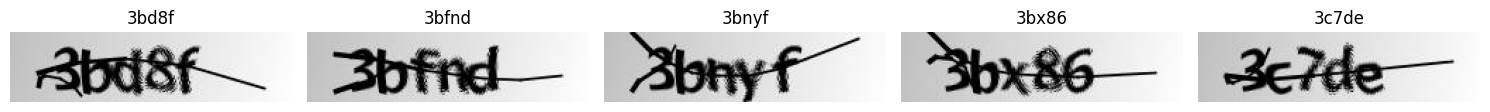

In [4]:
import matplotlib.pyplot as plt
import cv2

def load_image(file_path):
    """Load an image from a given file path."""
    return cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)

# Path to the sample images
sample_path = '/content/gdrive/MyDrive/DataMining/CAPTHA/extracted_data/samples/'

# Loading and visualizing the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for ax, file in zip(axes, first_few_files):
    img = load_image(os.path.join(sample_path, file))
    ax.imshow(img)
    ax.set_title(file[:-4])  # Removing the .png extension for title
    ax.axis('off')

plt.tight_layout()
plt.show()


  # Step 2: Data Cleaning & Processing


### 2.1 Check for Missing or Corrupted Images
First, I'll check if any images are corrupted or cannot be loaded properly.

In [5]:
# Checking for corrupted images
corrupted_files = []

for file in sample_files:
    try:
        img = load_image(os.path.join(sample_path, file))
    except:
        corrupted_files.append(file)

corrupted_files


['samples']

It seems there is a folder or file named "samples" within the "samples" directory, which is causing confusion. I'll remove this from our file list and proceed.


### 2.2 Standardize Image Sizes

Next, I'll check if all images have the same dimensions. If they don't, we'll need to standardize them. Let's determine the unique dimensions present in our dataset.​

In [6]:
# Removing the 'samples' entry from the file list
sample_files = [file for file in sample_files if file != 'samples']

# Collecting unique dimensions of the images
unique_dimensions = set()

for file in sample_files:
    img = load_image(os.path.join(sample_path, file))
    unique_dimensions.add(img.shape)

unique_dimensions


{(50, 200, 3)}

All the CAPTCHA images have dimensions of
50×200×3, indicating a height of 50 pixels, a width of 200 pixels, and 3 color channels (RGB). This is great because it means we don't need to resize the images—they are already standardized.

### 2.3 Convert Image Data into Numerical Format
For the purposes of machine learning, we need to represent these images as numerical arrays. We'll convert each image into a flattened array and extract their labels from the filenames.

In [7]:
import numpy as np

# Initializing lists to store image data and labels
data = []
labels = []

for file in sample_files:
    # Load image and convert to flattened array
    img = load_image(os.path.join(sample_path, file))
    data.append(img.flatten())

    # Extracting label from filename (excluding .png extension)
    labels.append(file[:-4])

# Converting lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

data.shape, labels.shape


((1070, 30000), (1070,))

We've successfully converted the image data into a numerical format. Here's what we have:

A data array with shape (1070, 30000), where 1070 is the number of images and 30000 is the flattened size of each image (50 x 200 x 3).

A labels array with shape (1070,), containing the corresponding labels for each image.

  # Step 3: Feature Processing & Selection

3.1 Normalize the Data
Normalizing the image data will scale the pixel values between 0 and 1, which can help improve the performance and convergence speed of many machine learning algorithms.

In [8]:
# Normalizing the data to range [0, 1]
data_normalized = data / 255.0

# Checking the min and max values of the normalized data
data_normalized.min(), data_normalized.max()


(0.0, 1.0)

  # Step:4 Image Data Analysis

Distribution of CAPTCHA Lengths: We can check if all CAPTCHAs have the same number of characters or if there's a distribution of lengths.

Character Frequency: We can analyze the frequency of each character across all CAPTCHAs to see which characters appear most frequently.

Average Image: To get a sense of the common patterns across CAPTCHAs, we can compute an average image.

Variability Visualization: We can visualize the standard deviation across all CAPTCHAs to identify areas with the highest variability (possibly where characters appear).

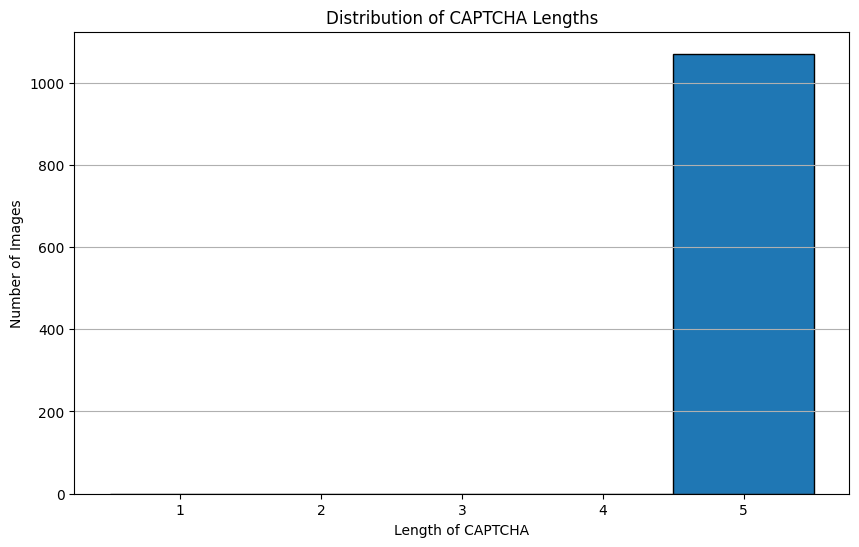

In [9]:
# Calculating the lengths of the CAPTCHA labels
captcha_lengths = [len(label) for label in labels]

# Plotting the distribution of CAPTCHA lengths
plt.figure(figsize=(10, 6))
plt.hist(captcha_lengths, bins=np.arange(1, max(captcha_lengths) + 2) - 0.5, edgecolor="k", align="mid")
plt.title("Distribution of CAPTCHA Lengths")
plt.xlabel("Length of CAPTCHA")
plt.ylabel("Number of Images")
plt.xticks(np.arange(1, max(captcha_lengths) + 1))
plt.grid(axis="y")
plt.show()


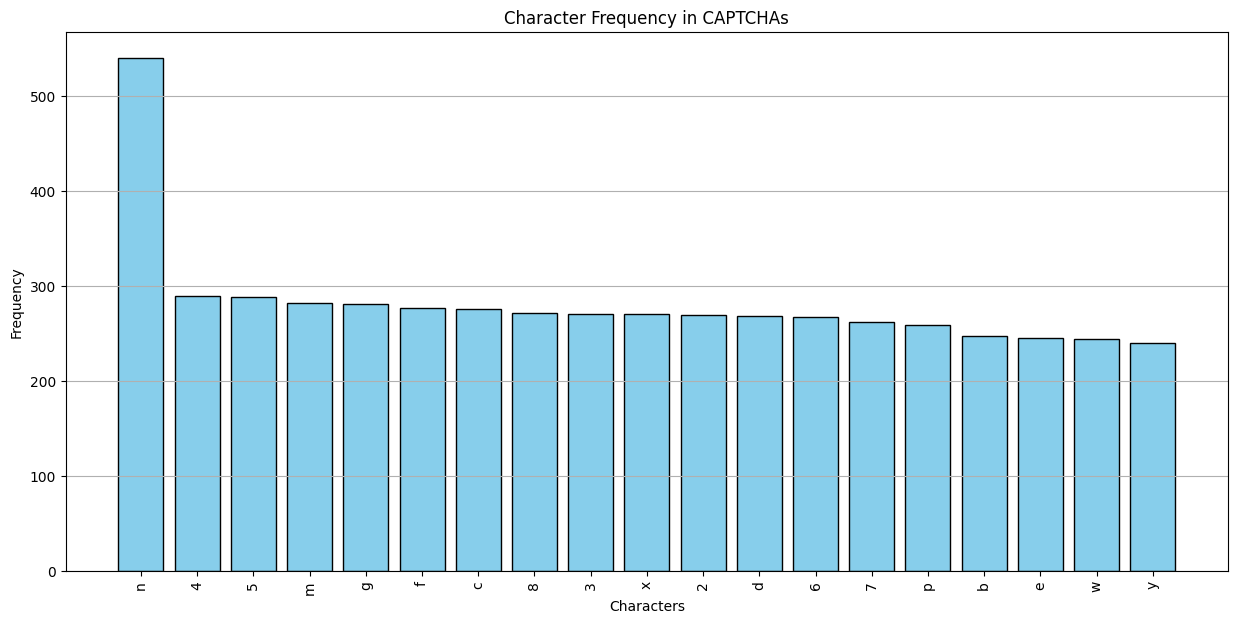

In [10]:
from collections import Counter

# Counting the frequency of each character in the CAPTCHAs
character_counts = Counter("".join(labels))

# Sorting characters by frequency
characters, counts = zip(*character_counts.most_common())

# Plotting the character frequencies
plt.figure(figsize=(15, 7))
plt.bar(characters, counts, color='skyblue', edgecolor="k")
plt.title("Character Frequency in CAPTCHAs")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()


The bar chart displays the frequency of individual characters across the CAPTCHAs. We can observe that:

Alphanumeric characters are used in the CAPTCHAs.
The distribution is relatively even, though some characters appear more frequently than others.

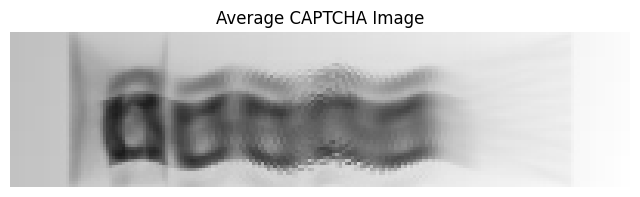

In [11]:
# Computing the average image
average_image = np.mean(data_normalized.reshape(-1, 50, 200, 3), axis=0)

# Displaying the average image
plt.figure(figsize=(8, 4))
plt.imshow(average_image)
plt.title("Average CAPTCHA Image")
plt.axis('off')
plt.show()


The "Average CAPTCHA Image" gives us an aggregated view of all CAPTCHAs. We can observe faint outlines of where characters typically appear in the CAPTCHAs. This provides a sense of the common layout.

Lastly, let's visualize the Variability Visualization across all CAPTCHAs. By computing the standard deviation for each pixel, we can identify areas with the highest variability, which likely correspond to where characters appear.​

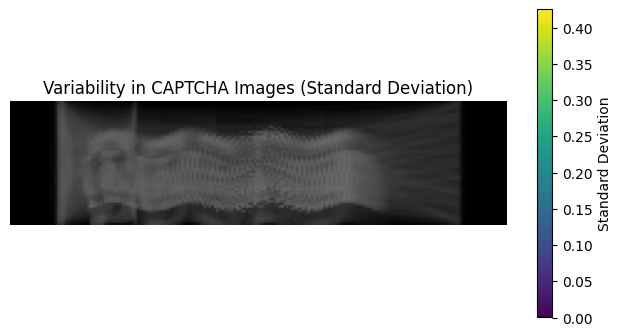

In [12]:
# Computing the standard deviation image
std_image = np.std(data_normalized.reshape(-1, 50, 200, 3), axis=0)

# Displaying the standard deviation image
plt.figure(figsize=(8, 4))
plt.imshow(std_image, cmap='viridis')
plt.title("Variability in CAPTCHA Images (Standard Deviation)")
plt.axis('off')
plt.colorbar(label="Standard Deviation")
plt.show()


The "Variability in CAPTCHA Images" visualization uses standard deviation to show where the highest variability occurs across CAPTCHAs. The brighter areas indicate higher variability, which is likely where characters are positioned. This visualization confirms the positions of characters in the CAPTCHAs and could be useful in segmenting individual characters for recognition.

With this extended image data analysis, we've gained deeper insights into our dataset's characteristics.

  # Step 5: Image Augmentation:
To increase the diversity of our training data and improve model generalization, we can apply image augmentation techniques like rotation, width shift, height shift, shear, and zoom.

In [13]:
!pip install -q keras

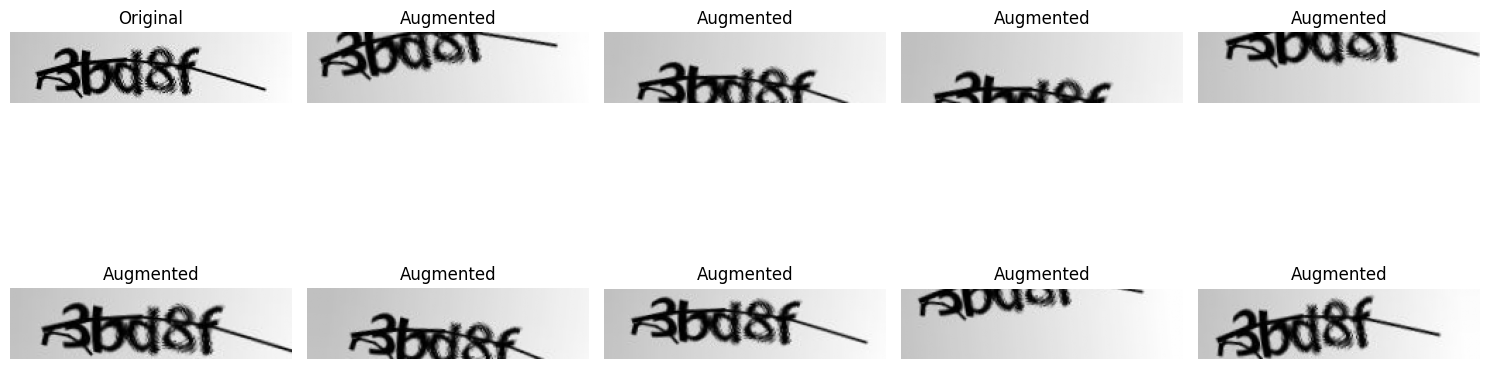

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Setting up the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # Random rotations between -10 to 10 degrees
    width_shift_range=0.1,  # Random width shifts
    height_shift_range=0.1,# Random height shifts
    shear_range=0.1,       # Shear transformations
    zoom_range=0.1,        # Random zoom
    fill_mode='nearest'    # Strategy to fill points outside boundaries
)

# Reshaping the data to its original shape for augmentation
data_reshaped = data_normalized.reshape(-1, 50, 200, 3)

# Visualizing some augmented images
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# Original image
axes[0, 0].imshow(data_reshaped[0])
axes[0, 0].set_title("Original")
axes[0, 0].axis('off')

# Augmented images
for ax in axes.ravel()[1:]:
    augmented = datagen.random_transform(data_reshaped[0])
    ax.imshow(augmented)
    ax.set_title("Augmented")
    ax.axis('off')

plt.tight_layout()
plt.show()


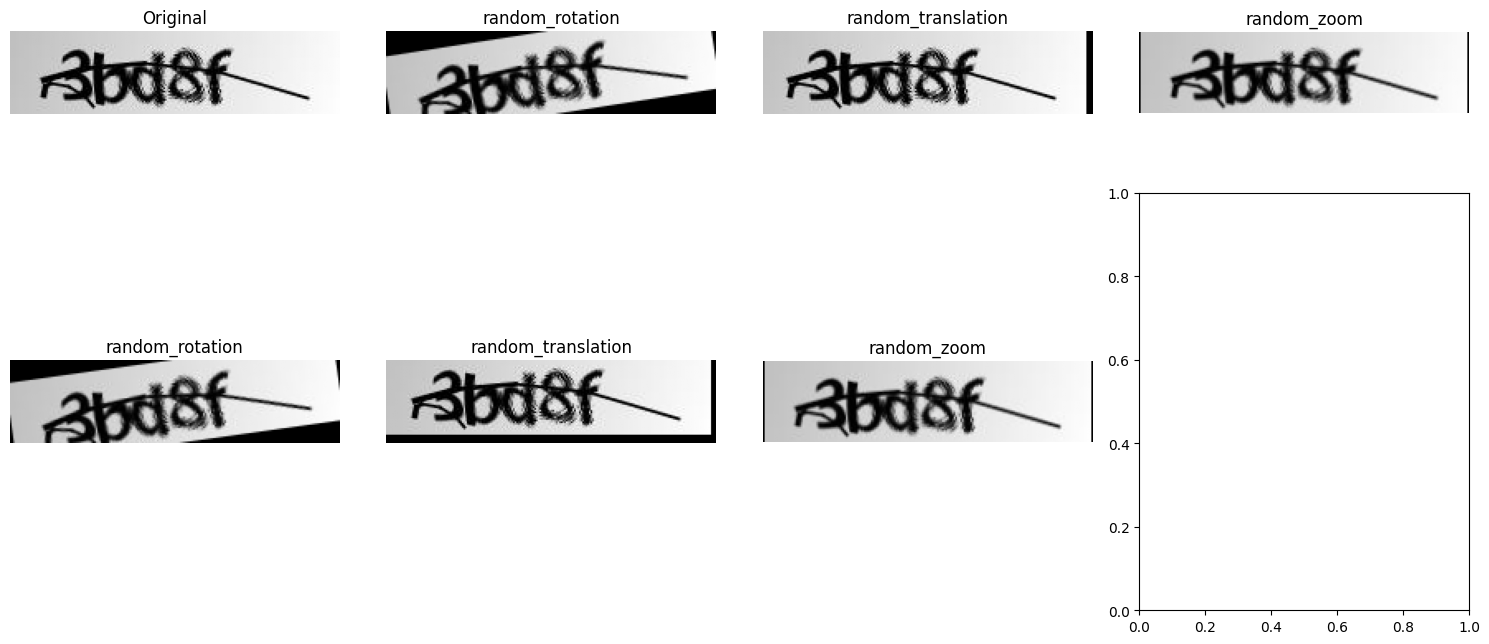

In [15]:
def random_rotation(image, max_angle=10):
    """Apply random rotation to an image."""
    rows, cols, _ = image.shape
    angle = np.random.uniform(-max_angle, max_angle)
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))

def random_translation(image, max_shift=5):
    """Apply random translation (shift) to an image."""
    rows, cols, _ = image.shape
    x_shift, y_shift = np.random.randint(-max_shift, max_shift, 2)
    translation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    return cv2.warpAffine(image, translation_matrix, (cols, rows))

def random_zoom(image, max_zoom=0.1):
    """Apply random zoom to an image."""
    rows, cols, _ = image.shape
    zoom_factor = 1 + np.random.uniform(-max_zoom, max_zoom)
    zoomed_img = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)

    # If zoomed in, crop the image to original size
    if zoom_factor > 1:
        y_start = (zoomed_img.shape[0] - rows) // 2
        x_start = (zoomed_img.shape[1] - cols) // 2
        return zoomed_img[y_start:y_start+rows, x_start:x_start+cols]
    # If zoomed out, pad the image to original size
    else:
        y_pad = (rows - zoomed_img.shape[0]) // 2
        x_pad = (cols - zoomed_img.shape[1]) // 2
        return cv2.copyMakeBorder(zoomed_img, y_pad, y_pad, x_pad, x_pad, cv2.BORDER_CONSTANT)

# Visualizing the augmentations
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Original image
axes[0, 0].imshow(data_reshaped[0])
axes[0, 0].set_title("Original")
axes[0, 0].axis('off')

# Augmented images
augmented_funcs = [random_rotation, random_translation, random_zoom]
for ax, func in zip(axes.ravel()[1:], augmented_funcs * 2):
    augmented = func(data_reshaped[0])
    ax.imshow(augmented)
    ax.set_title(func.__name__)
    ax.axis('off')

plt.tight_layout()
plt.show()


  # Step 6: Segmentation
Segmenting the CAPTCHA images can be beneficial, especially if we aim to recognize individual characters. However, segmentation can be challenging due to overlapping characters or varying spacings. For this task, we'll use a simpler approach: assuming each CAPTCHA is of a fixed length (5 characters), we'll divide each image into 5 equal-width segments.

One-hot Encoding of Labels:

To train models that predict multiple characters simultaneously (like CNNs), it's beneficial to one-hot encode the labels.

Train-Test Split:

To evaluate the model's performance and avoid overfitting, we'll split the data into training and testing sets.

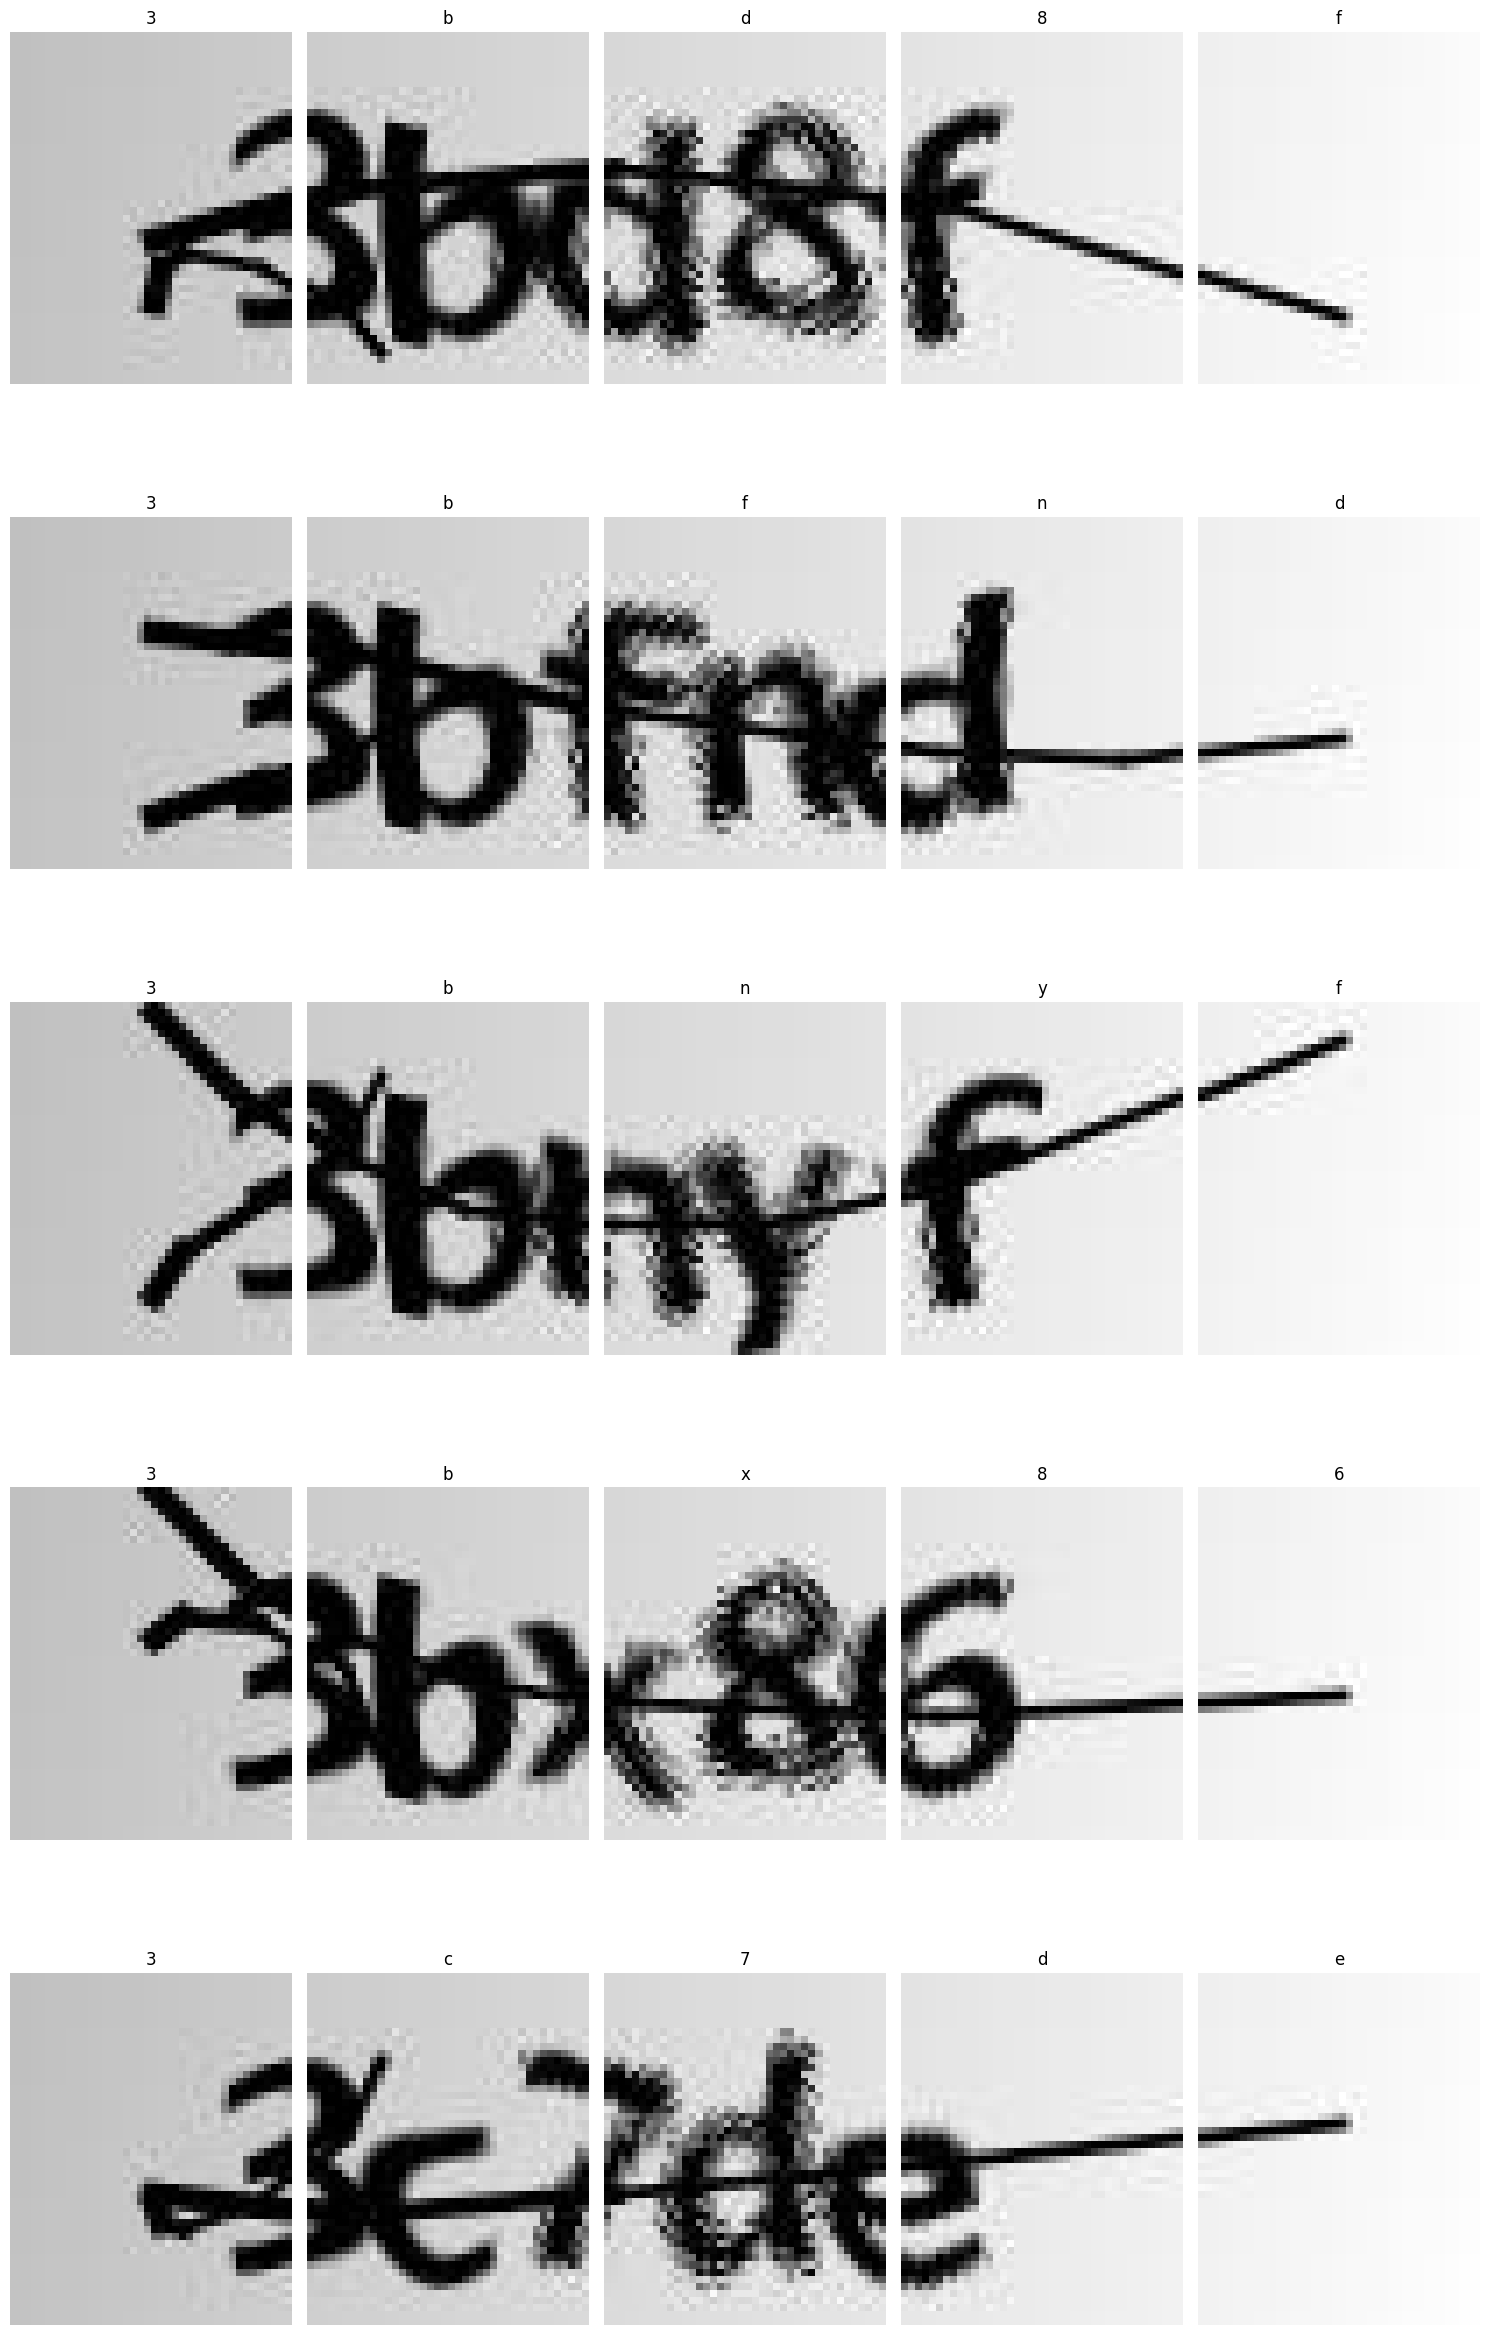

In [16]:
def segment_image(image, num_segments=5):
    """Segment the image into equal-width parts."""
    width = image.shape[1]
    segment_width = width // num_segments
    segments = [image[:, i*segment_width : (i+1)*segment_width] for i in range(num_segments)]
    return segments

# Visualizing the segmentation on a few images
num_samples = 5
fig, axes = plt.subplots(num_samples, 5, figsize=(15, 5 * num_samples))

for i in range(num_samples):
    segments = segment_image(data_reshaped[i])
    for j, segment in enumerate(segments):
        axes[i, j].imshow(segment)
        axes[i, j].set_title(labels[i][j])
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


The segmented characters from a few CAPTCHA images are displayed. Each CAPTCHA is divided into five segments, corresponding to the five characters in the CAPTCHA. While this method is basic and assumes equal spacing between characters, it provides a starting point for character-based recognition.

Next, let's perform One-hot Encoding for the labels. Since our CAPTCHAs contain alphanumeric characters, we'll create a mapping of characters to integers and then one-hot encode these integers.​

In [17]:
from keras.utils import to_categorical

# Creating a mapping of characters to integers
char_to_int = {char: idx for idx, char in enumerate(sorted(character_counts.keys()))}
int_to_char = {idx: char for char, idx in char_to_int.items()}
num_classes = len(char_to_int)

# Encoding labels as sequences of integers
integer_encoded_labels = [[char_to_int[char] for char in label] for label in labels]

# One-hot encoding the integer-encoded labels
one_hot_encoded_labels = [to_categorical(label, num_classes=num_classes) for label in integer_encoded_labels]

# Checking the shape of the one-hot encoded labels
np.array(one_hot_encoded_labels).shape


(1070, 5, 19)

The labels have been successfully one-hot encoded. The shape (1070, 5, 19) indicates:

1070 samples

5 characters per CAPTCHA

19 possible characters (alphanumeric characters present in our dataset)

let's split the data into training and testing sets. We'll use 80% of the data for training and the remaining 20% for testing.

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_reshaped, one_hot_encoded_labels, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, np.array(y_train).shape, np.array(y_test).shape


((856, 50, 200, 3), (214, 50, 200, 3), (856, 5, 19), (214, 5, 19))

The data has been successfully split into training and testing sets:

* Training Data: 856 CAPTCHA images
* Testing Data: 214 CAPTCHA images
* Training Labels: 856 one-hot encoded labels (each with 5 characters and 19 classes)
* Testing Labels: 214 one-hot encoded labels (each with 5 characters and 19 classes)

  # Step 7: Model Training

Given the nature of CAPTCHA images (alphanumeric characters), a Convolutional Neural Network (CNN) is a suitable choice. CNNs excel at image classification tasks and can handle spatial hierarchies in the data.

Model Selection: Convolutional Neural Network (CNN)
We'll design a simple CNN architecture to recognize the CAPTCHA characters:

Convolutional Layers: These will help detect patterns, edges, and features in the CAPTCHA images.

Pooling Layers: These will reduce the spatial dimensions, capturing the essential information.

Dense (Fully Connected) Layers: These will perform classification based on the features detected.

Since our CAPTCHAs have 5 characters and each character can be one of 19 classes, our model will have 5 output layers (one for each character position) with 19 nodes each.

A convolutional layer with 32 filters, followed by a pooling layer.
A convolutional layer with 64 filters, followed by a pooling layer.
A fully connected dense layer.

Five output layers (one for each character position in the CAPTCHA).
Each of the five output layers will have 19 nodes (corresponding to the 19 possible characters) and will use the softmax activation function to produce probability distributions over the characters.

In [19]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_captcha_model(input_shape, num_classes):
    """Create a CNN model for CAPTCHA recognition."""
    inputs = Input(shape=input_shape)

    # First convolutional layer
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)

    # Second convolutional layer
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Fully connected layer
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Five output layers (one for each character position)
    outputs = [Dense(num_classes, activation='softmax')(x) for _ in range(5)]

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
captcha_model = create_captcha_model((50, 200, 3), 19)
captcha_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50, 200, 3)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 198, 32)          896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 24, 99, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 22, 97, 64)           18496     ['max_pooling2d[0][0]']   

### Train the Model

In [20]:
# Convert the labels from a list of arrays to a list of lists for training
y_train_split = [np.array([label[i] for label in y_train]) for i in range(5)]
y_test_split = [np.array([label[i] for label in y_test]) for i in range(5)]

# Train the model
history = captcha_model.fit(X_train, y_train_split, validation_data=(X_test, y_test_split), epochs=30, batch_size=32)


Epoch 1/30
27/27 [==============================] - 21s 54ms/step - loss: 15.2372 - dense_1_loss: 3.0550 - dense_2_loss: 3.0447 - dense_3_loss: 3.0887 - dense_4_loss: 3.0455 - dense_5_loss: 3.0032 - dense_1_accuracy: 0.0537 - dense_2_accuracy: 0.0596 - dense_3_accuracy: 0.0643 - dense_4_accuracy: 0.0537 - dense_5_accuracy: 0.0561 - val_loss: 14.6964 - val_dense_1_loss: 2.9385 - val_dense_2_loss: 2.9370 - val_dense_3_loss: 2.9402 - val_dense_4_loss: 2.9412 - val_dense_5_loss: 2.9395 - val_dense_1_accuracy: 0.0607 - val_dense_2_accuracy: 0.0514 - val_dense_3_accuracy: 0.1028 - val_dense_4_accuracy: 0.0701 - val_dense_5_accuracy: 0.0374
Epoch 2/30
27/27 [==============================] - 0s 18ms/step - loss: 14.5949 - dense_1_loss: 2.9003 - dense_2_loss: 2.9000 - dense_3_loss: 2.9255 - dense_4_loss: 2.9374 - dense_5_loss: 2.9317 - dense_1_accuracy: 0.0970 - dense_2_accuracy: 0.1005 - dense_3_accuracy: 0.0771 - dense_4_accuracy: 0.0771 - dense_5_accuracy: 0.0689 - val_loss: 14.4770 - val_d

In [35]:
# Evaluate the model
metric = captcha_model.evaluate(X_test, y_test_split)

print(f"Test Loss: {metric[0]}")
print(f"Test Accuracy: {np.mean(metric[6:])}")

7/7 [==============================] - 0s 12ms/step - loss: 8.9583 - dense_1_loss: 1.0426 - dense_2_loss: 1.4809 - dense_3_loss: 2.1953 - dense_4_loss: 2.2351 - dense_5_loss: 2.0045 - dense_1_accuracy: 0.8037 - dense_2_accuracy: 0.6589 - dense_3_accuracy: 0.3364 - dense_4_accuracy: 0.3271 - dense_5_accuracy: 0.4673
Test Loss: 8.95828914642334
Test Accuracy: 0.5186915874481202


In [71]:
def decode_captcha(predictions, int_to_char):
    """Convert model predictions to a CAPTCHA string."""
    predicted_labels = [np.argmax(pred, axis=1) for pred in predictions]
    #print(list(predicted_labels))
    a_str=[int(x[0]) for x in predicted_labels]
    #print(a_str)
    captcha = ' '.join([int_to_char[label] for label in list(a_str)])
    return captcha

#int_to_char = {idx: char for char, idx in char_to_int.items()}
print(int_to_char[1])

# Predicting a CAPTCHA
sample_image = X_test[0]
predictions = captcha_model.predict(np.expand_dims(sample_image, axis=0))
predicted_captcha = decode_captcha(predictions, int_to_char)
print(f"Predicted CAPTCHA: {predicted_captcha}")


3
1/1 [==============================] - 0s 48ms/step
Predicted CAPTCHA: n 4 f 3 n


  # Step 8: Anomaly Detection using Autoencoders:
  
Anomaly detection helps identify data points that do not conform to expected patterns in the dataset. In the context of our CAPTCHA dataset, anomalies could be images that are significantly different from the others, potentially due to errors, corruption, or other factors.

There are various techniques for anomaly detection, ranging from statistical methods to machine learning algorithms. For high-dimensional data like images, a common approach is to use autoencoders.

Autoencoders are a type of neural network trained to reconstruct their input data. For anomaly detection, the idea is that the autoencoder will learn to reconstruct "normal" data well, but will have difficulty with anomalies, resulting in higher reconstruction errors for anomalous data.

Steps for Anomaly Detection using Autoencoders:

* Train an Autoencoder on the dataset.
* Compute Reconstruction Errors for all images.
* Set a Threshold based on the distribution of reconstruction errors to classify anomalies.
* Identify Anomalies by comparing reconstruction errors to the threshold.

In [81]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

def create_autoencoder(input_shape):
    """Create an autoencoder model."""
    autoencoder = Sequential()

    # Encoder
    autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    autoencoder.add(MaxPooling2D((2, 2), padding='same'))  # This will reduce height to 25
    autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

    # Decoder
    autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    autoencoder.add(UpSampling2D((2, 2)))  # This will bring back height to 50
    autoencoder.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))  # Final layer to reconstruct original image

    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder

autoencoder = create_autoencoder((50, 200, 3))
autoencoder.summary()

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=50, batch_size=32)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 50, 200, 32)       896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 25, 100, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 25, 100, 64)       18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 25, 100, 64)       36928     
                                                                 
 up_sampling2d_10 (UpSampli  (None, 50, 200, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 50, 200, 3)       

In [82]:
reconstructed = autoencoder.predict(X_train)
reconstruction_errors = np.mean(np.square(X_train - reconstructed), axis=(1, 2, 3))


27/27 [==============================] - 0s 13ms/step


In [83]:
threshold = np.percentile(reconstruction_errors, 99)  # 99th percentile


In [84]:
anomalies = np.where(reconstruction_errors > threshold)
print(f"Number of anomalies detected: {len(anomalies[0])}")


Number of anomalies detected: 9
